### Clust PC example notebook
Requirements: causallearn

In [2]:
!pip install causal-learn
%load_ext autoreload
# !pip install Ipython --upgrade
# !pip install autoreload
# !pip install networkx
# !pip install gcastle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You should consider upgrading via the 'C:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
# %load_ext autoreload # Depending on environment might not be necessary
%autoreload 2
# from ipython import autoreload
import numpy as np
import causallearn
import random
from clustcausal.algs.clust_pc import ClustPC
from clustcausal.clusterdag.cluster_dag import CDAG
from clustcausal.utils.utils import *

In [ ]:
# Define the nodes (have to be in topological ordering):
nodes = ['X1', 'X2', 'X3', 'Y1', 'Y2', 'Z1', 'Z2', 'Z3']
# nodes = ['X1', 'Y1', 'Z1', 'Z2', 'Z3']
# Define the edges (have to be in topological ordering):
edges = [('X1', 'X2'), ('X3', 'X2'), ('X3', 'Z3'), ('X2', 'Z2'), ('X1','Z1'), ('Y1','Z1'), ('Y2', 'Z2'), ('Y1','Z2'), ('Z1','Z2'), ('Z2','Z3')]
# edges = [('X1','Z1'), ('Y1','Z1'), ('Y1','Z2'), ('Z1','Z2'), ('Z2','Z3')]
# Define the cluster mapping:
cluster_mapping = {'X': ['X1', 'X2', 'X3'], 'Y': ['Y1', 'Y2'], 'Z': ['Z1', 'Z2', 'Z3']}
# cluster_mapping = {'X': ['X1'], 'Y': ['Y1'], 'Z': ['Z1', 'Z2', 'Z3']}
# Define the cluster edges:
cluster_edges = [('X', 'Z'), ('Y', 'Z')]

In [ ]:
# # Further example C-DAGs
# perfect_cluster_mapping = {'C1': ['X1'], 'C2': ['X2'], 'C3': ['X3'], \
#                    'C4': ['X4'], 'C5': ['X5'], 'C6': ['X6'], 'C7': ['X7']}
# perfect_cluster_edges = [('C1', 'C2'), ('C2', 'C3'), ('C3', 'C4'), ('C4', 'C5'), \
#                  ('C1', 'C6'), ('C4', 'C6'), ('C5', 'C6'), ('C1', 'C7'), \
#                     ('C2', 'C7'), ('C6', 'C7')]
# # Or, an actual C-DAG
# cluster_mapping = {'C1': ['X1', 'X2', 'X3'], 'C2': ['X4', 'X5'], 'C3': ['X6', 'X7']}
# cluster_edges = [('C1', 'C2'), ('C1', 'C3'), ('C2', 'C3')]
# # Cluster mapping for 4 variables
# # cluster_mapping = {'C1': ['X1', 'X2'], 'C2':['X3','X4']}
# # cluster_edges = [('C1', 'C2')]
# cdag = CDAG(perfect_cluster_mapping, perfect_cluster_edges)
# cdag = CDAG(cluster_mapping, cluster_edges)
# cdag.node_names
# cdag.draw_cluster_graph()

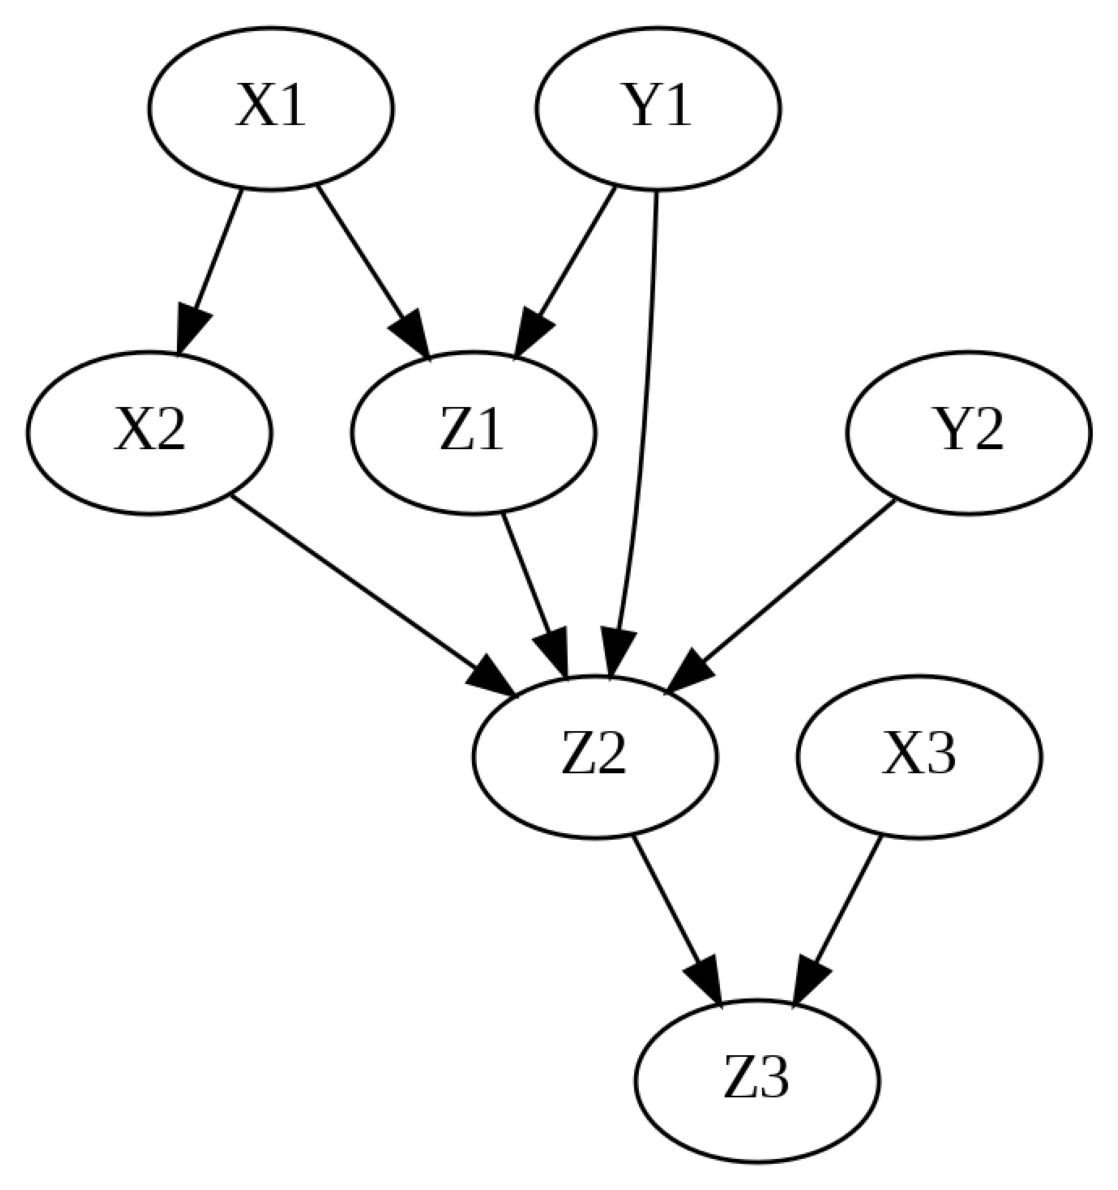

In [ ]:
# Draw the ground truth graph
draw_graph(nodes, edges)

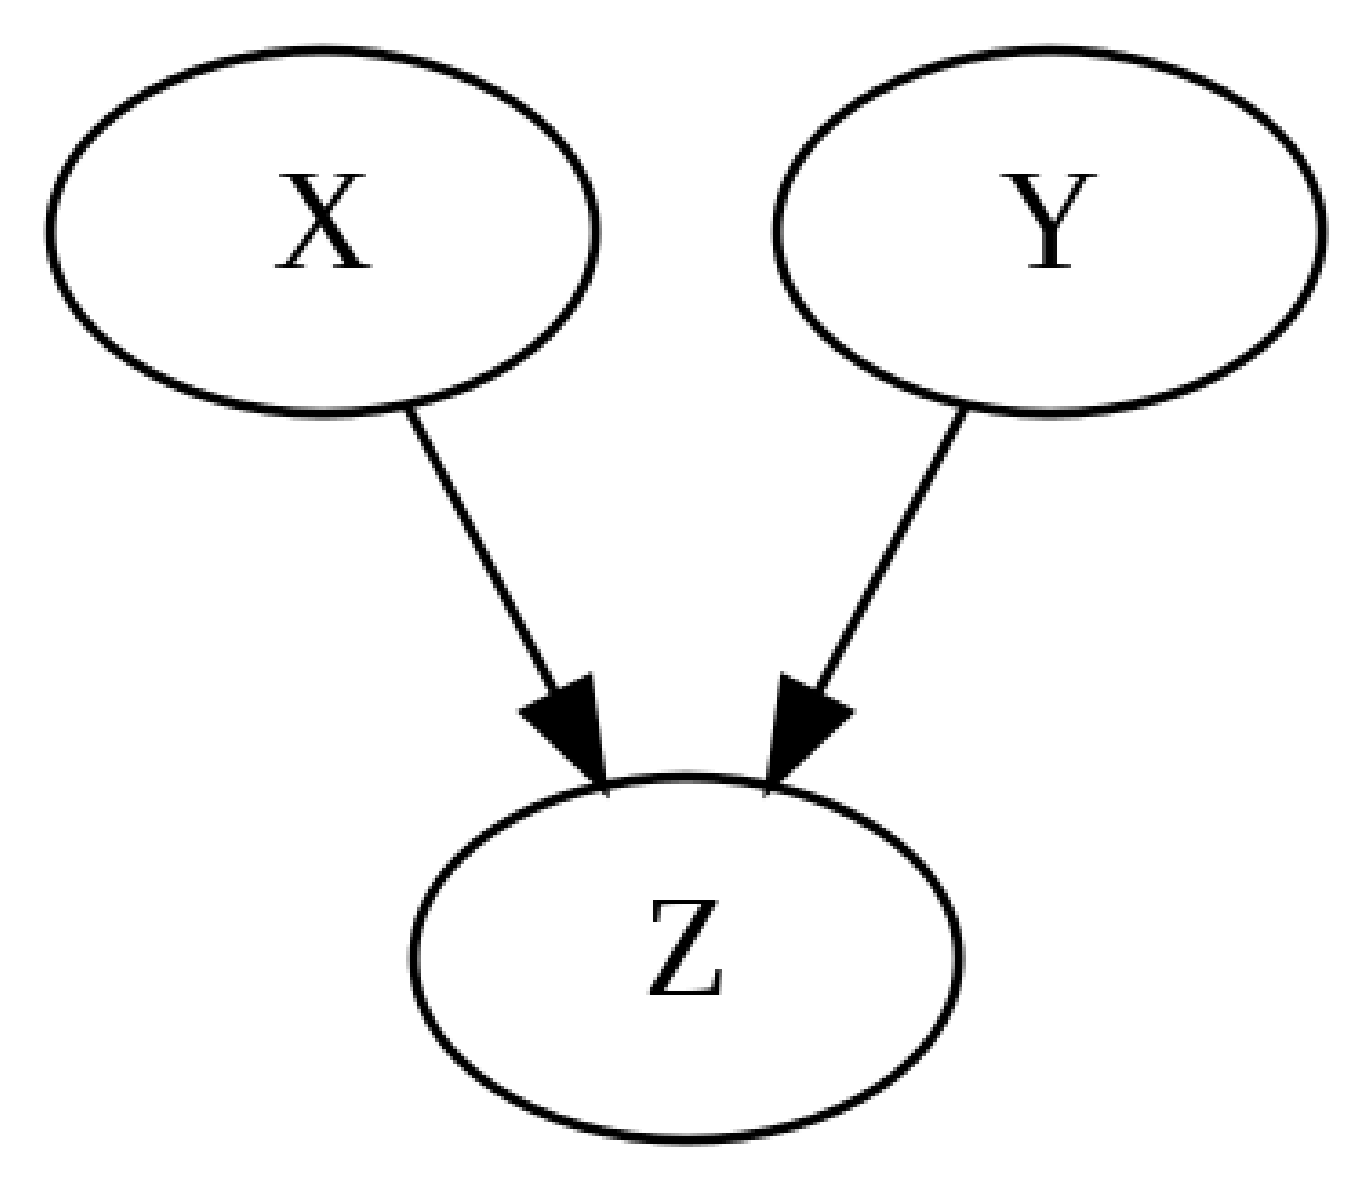

In [ ]:
# Draw the cluster graph
cdag = CDAG(cluster_mapping, cluster_edges)
cdag.cluster_graph.draw_pydot_graph()

In [ ]:
# Generate Gaussian ANM
# Example edge_weights, if None is given, they will be generated randomly
# edge_weights = {('X1', 'Z1'): 1, ('Y1', 'Z1'): 2, ('Y1', 'Z2'): 1, ('Z1', 'Z2'): -3, ('Z2', 'Z3'): 2}
edge_weights = None
data, edge_weights = generate_gaussian_anm(nodes, edges, edge_weights = edge_weights)
print(data.shape, edge_weights)

(10000, 8) {('X1', 'X2'): 2, ('X3', 'X2'): -1, ('X3', 'Z3'): 3, ('X2', 'Z2'): -3, ('X1', 'Z1'): 3, ('Y1', 'Z1'): -3, ('Y2', 'Z2'): -2, ('Y1', 'Z2'): 1, ('Z1', 'Z2'): -2, ('Z2', 'Z3'): 2}


In [ ]:
# # For illustrative purposes, get mpdag and draw it manually (usually ClustPC handles this)
# mpdag = cdag.cdag_to_mpdag()
# cdag.draw_mpdag()

In [ ]:
# Run ClustPC
# %autoreload 2
clustpc = ClustPC(cdag = cdag, data = data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = True, show_progress=True)

In [ ]:
result_cdag = clustpc.run()

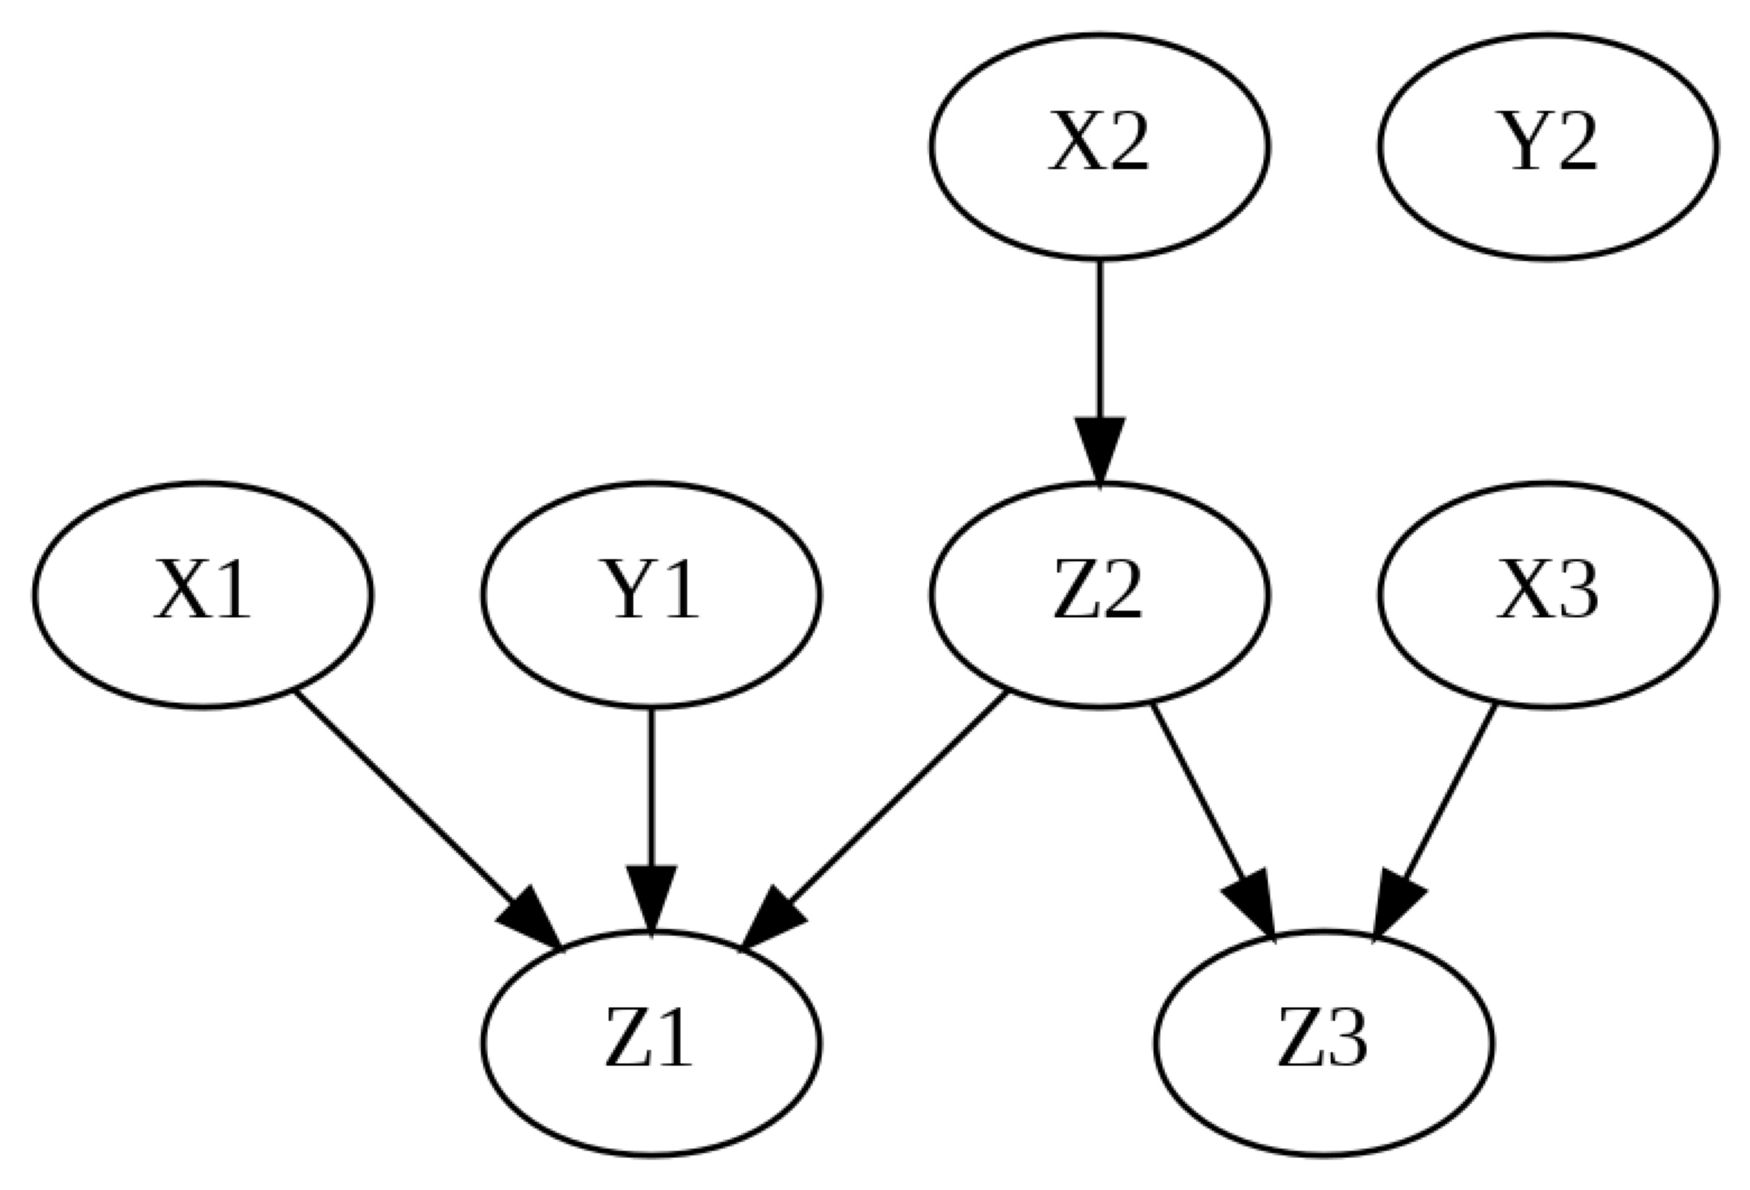

In [ ]:
result_cdag.draw_pydot_graph()

In [ ]:
# comparison to pc from causallearn
from causallearn.search.ConstraintBased.PC import pc
causallearn_cg = pc(data)
causallearn_cg.node_names = nodes
causallearn_cg.draw_pydot_graph(labels = nodes)

In [ ]:
causallearn_cg.node_names

['X1', 'X2', 'X3', 'Y1', 'Y2', 'Z1', 'Z2', 'Z3']

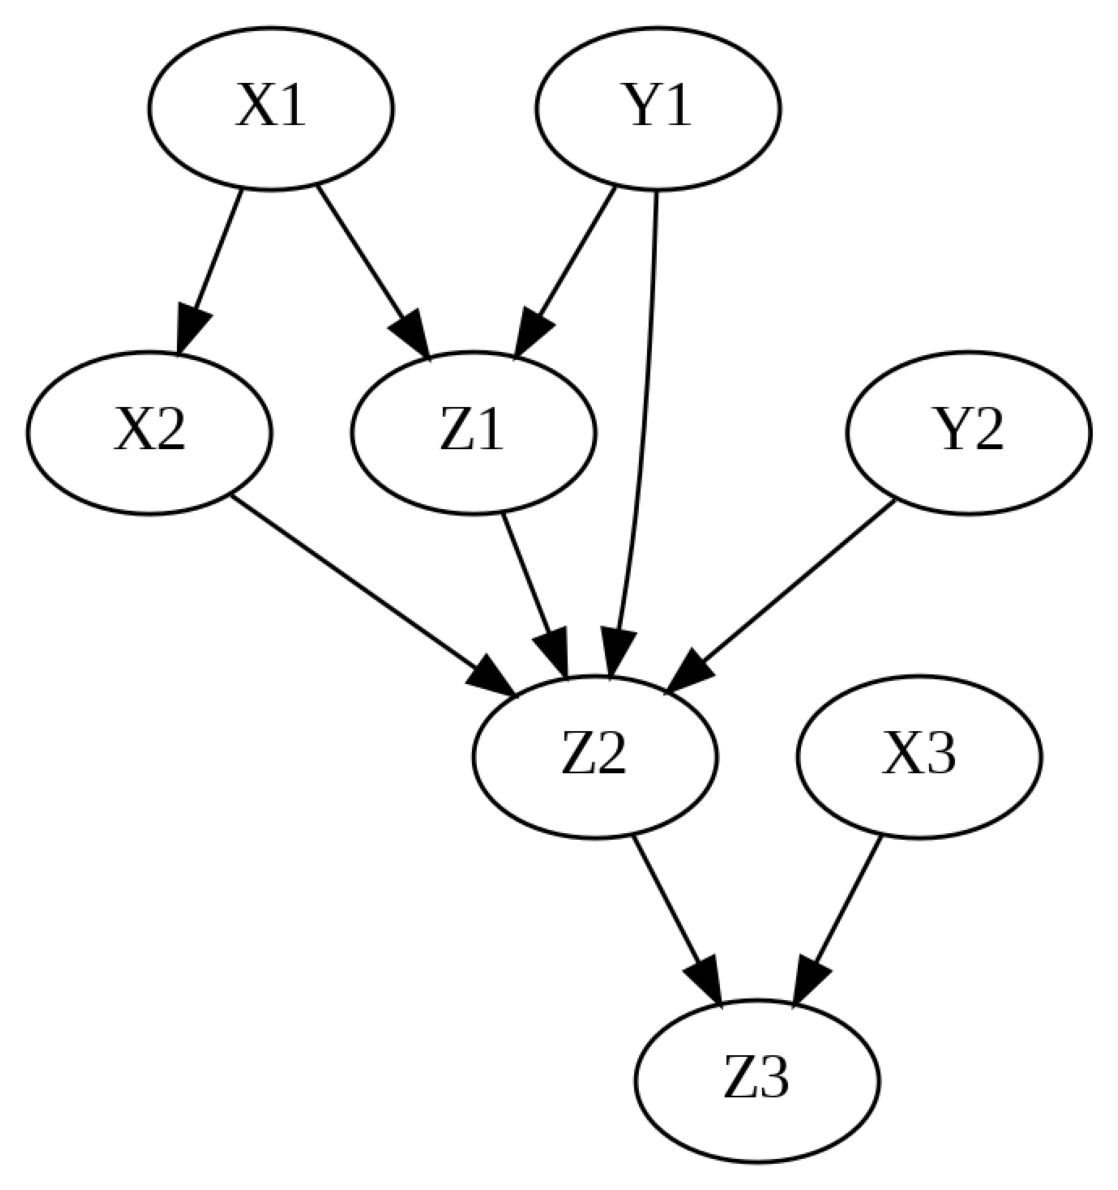

In [ ]:
draw_graph(nodes, edges)